<a href="https://colab.research.google.com/github/Ravi-Poddar26/Feature-Engineering/blob/master/Feature_scaling2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import zipfile
with zipfile.ZipFile('/content/archive (1).zip') as data:
  data.extractall()

# Normalization:

Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale , without distorting difference in the range of values or losing imformation.

## types of Normalization:
1. MinMaxScaling *
2.Mean Normalization
3.Max absolute Scaling
4.Robust Scaling

1. **MinMaxScaling:**

formula == X_scaled = (X - X_min) / (X_max - X_min)

range = [0, 1]

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Wine dataset.csv')

In [3]:
data

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
data = data.iloc[:,:3]

In [5]:
data

,class,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='Alcohol', ylabel='Density'>

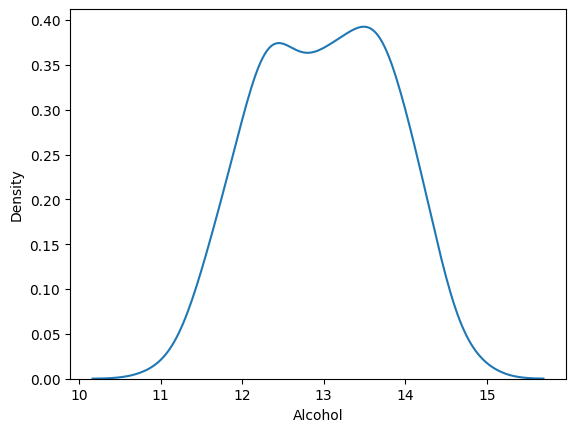

In [6]:
sns.kdeplot(data['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

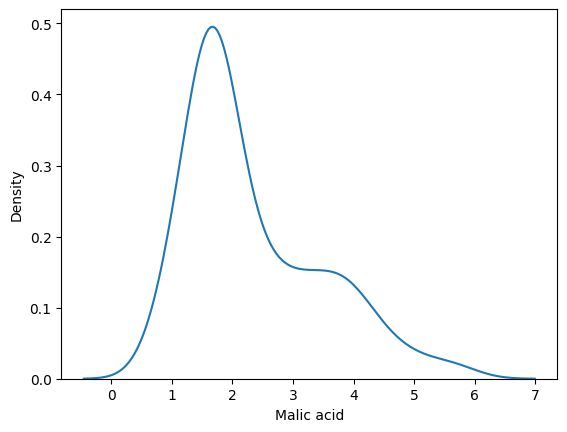

In [7]:
sns.kdeplot(data['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

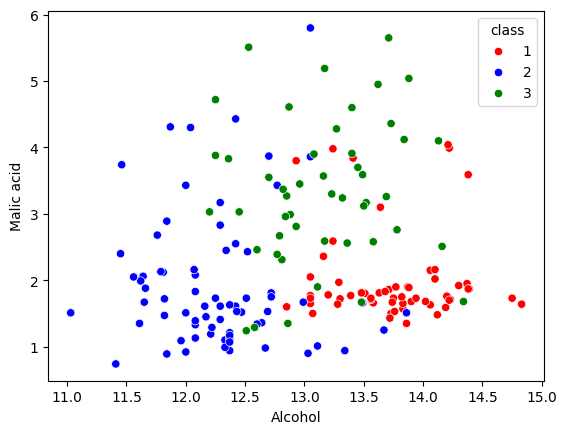

In [8]:
color_dict = {1:'red',2:'blue',3:'green'}
sns.scatterplot(x=data['Alcohol'],y=data['Malic acid'],hue=data['class'],palette=color_dict)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('class',axis=1),data['class'],test_size=0.3,random_state=0)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((124, 2), (54, 2), (124,), (54,))

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
X_train_scaled

array([[0.72043011, 0.20378151],
       [0.31989247, 0.08403361],
       [0.60215054, 0.71218487],
       [0.57258065, 0.56302521],
       [0.76075269, 0.1302521 ],
       [0.48924731, 0.5       ],
       [0.75537634, 0.67857143],
       [0.61021505, 0.17436975],
       [0.54301075, 0.62394958],
       [0.39784946, 0.07352941],
       [0.33870968, 0.1092437 ],
       [0.46774194, 0.53361345],
       [0.5188172 , 0.53781513],
       [0.70967742, 0.07563025],
       [0.57258065, 0.30882353],
       [0.36021505, 0.0105042 ],
       [0.38709677, 0.13235294],
       [0.20967742, 0.25840336],
       [0.59408602, 0.64915966],
       [0.82526882, 0.26680672],
       [0.15591398, 0.09663866],
       [0.52688172, 0.16386555],
       [0.46774194, 0.31512605],
       [0.65860215, 0.16386555],
       [0.1155914 , 0.5987395 ],
       [0.27956989, 0.26680672],
       [0.21236559, 0.12184874],
       [0.65053763, 0.59033613],
       [0.31451613, 0.44957983],
       [0.54301075, 0.17647059],
       [0.

In [13]:
#convert array into DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [14]:
X_train_scaled

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [15]:
np.round(X_train_scaled.describe(),4)

,Alcohol,Malic acid
count,124.0000,124.0000
mean,0.5250,0.3138
std,0.2154,0.2388
min,0.0000,0.0000
25%,0.3582,0.1507
50%,0.5403,0.2090
75%,0.7016,0.4953
max,1.0000,1.0000


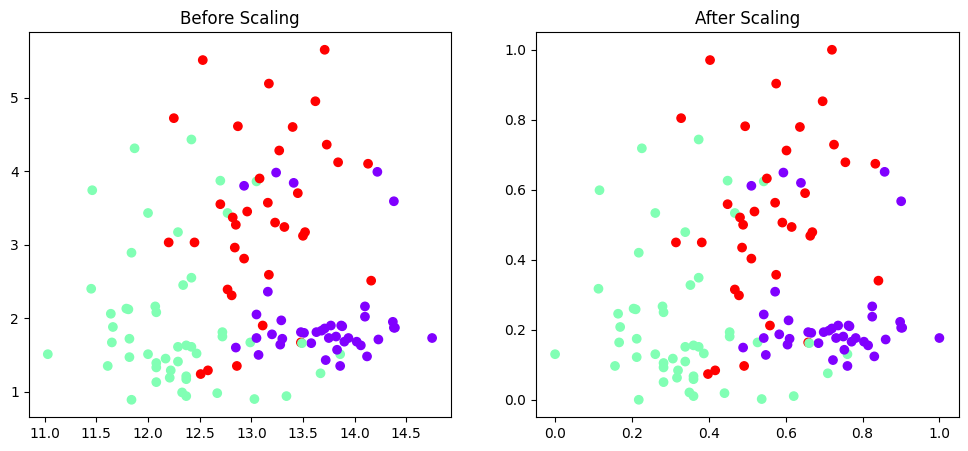

In [16]:
fig, (fig1, fig2) = plt.subplots(ncols=2, figsize=(12, 5))
fig1.set_title('Before Scaling')
fig1.scatter(x=X_train['Alcohol'], y=X_train['Malic acid'],c= y_train, cmap= 'rainbow')

fig2.set_title('After Scaling')
fig2.scatter(x=X_train_scaled['Alcohol'], y=X_train_scaled['Malic acid'],c= y_train, cmap= 'rainbow')



<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

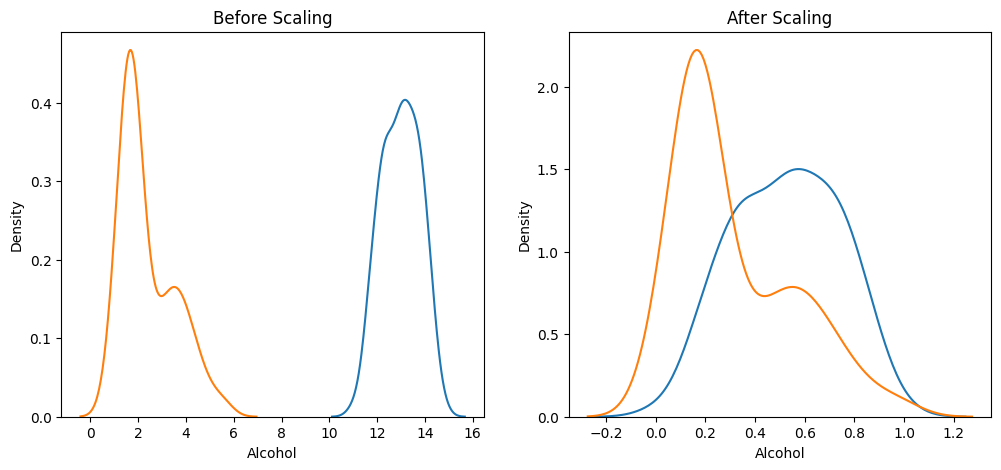

In [25]:
fig, (fig1,fig2) = plt.subplots(ncols = 2, figsize = (12, 5))

# befoe scalling
fig1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=fig1)
sns.kdeplot(X_train['Malic acid'], ax=fig1)

# after scaling
fig2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=fig2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=fig2)

<Axes: title={'center': 'Alcohol distribution After Scaling'}, xlabel='Alcohol', ylabel='Density'>

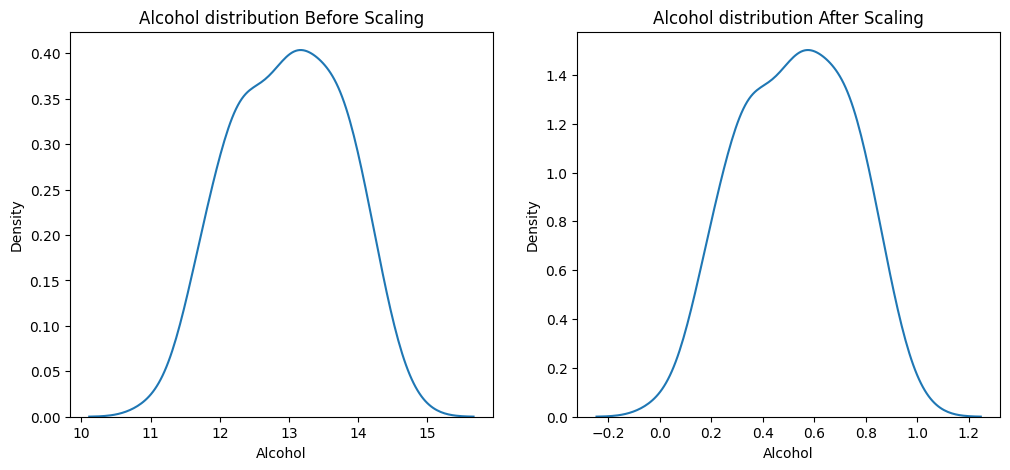

In [27]:
fig, (fig1,fig2) = plt.subplots(ncols = 2, figsize = (12, 5))

# befoe scalling
fig1.set_title('Alcohol distribution Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=fig1)

# after scaling
fig2.set_title('Alcohol distribution After Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=fig2)

<Axes: title={'center': 'After Scaling'}, xlabel='Malic acid', ylabel='Density'>

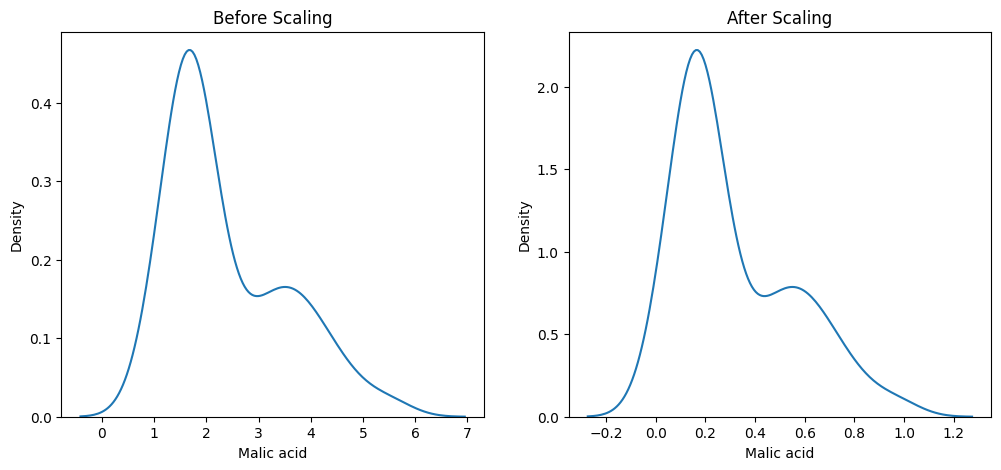

In [28]:
fig, (fig1,fig2) = plt.subplots(ncols = 2, figsize = (12, 5))

# befoe scalling
fig1.set_title('Before Scaling')
sns.kdeplot(X_train['Malic acid'], ax=fig1)

# after scaling
fig2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Malic acid'], ax=fig2)

# 2. Mean Normalisation


x_scaled = x-mean(x)/(max(x)-min(x))

Range = [-1,1]

this is useful for centered data and make your own.

# 3. Max Absolute Scaling

x_scaled = x/|max(x)|

this is useful when many number is zero in the data set.

# 4. Robust scaling

In [ ]:
x_scaled = x-median(x)/IQR

IQR = inter quantile range (75percentile - 25 percentile)

this is useful when many outlier present in the data.